### conceito

Quanto mais dimensões um conjunto de dados possui, mais distantes as instâncias deste conjunto estarão uma das outras, o que afeta diretamente a qualidade dos modelos: por exemplo, se uma nova instância for colocada em um espaço com várias dimensões, provavelmente ela estará muito longe de qualquer outra instância, o que fará com que seja necessária uma extrapolação maior para relacioná-la com outras instâncias. Essa é a **maldição da dimensionalidade**, e para lidar com ela existem alguns métodos de redução da dimensionalidade. O mais básico é o da projeção, onde os dados são projetados em uma dimensão inferior, mas só funciona quando os dados estão perpendiculares à dimensão inferior de modo que sejam bem representados nela. O algoritmo de redução de dimensionalidade mais popular é o PCA.

O **Principal Component Analysis - PCA** usa uma matriz com amostras x atributos e devolve uma nova matriz cujas colunas são combinações lineares das colunas originais que buscam maximizar a variância. O objetivo é reduzir o número de atributos (que passarão a ser os componentes) de modo que a maior parte possível da variância seja mantida.

Com o PCA do sklearn é possível ver quanto cada atributo contribui para cada componente.

In [1]:
# importar pacotes

import pandas as pd
import numpy as np

# importando dados
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# preprocessamento dos dados

from sklearn.preprocessing import StandardScaler

X = df.iloc[:,0:4]
y = df.iloc[:,4:5]

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### sklearn

In [3]:
from sklearn.decomposition import PCA

# em vez de indicar o número de componentes, é possível indicar a variância mínima a ser preservada (n_components = 0.9)
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_scaled)

# primeiro componente principal
pca.components_.T[:, 0]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

### from scratch

In [4]:
# matriz de covariância

features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [5]:
# eigenvectors ()

values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [6]:
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [7]:
# explicabilidade de cada componente principal (o primeiro valor, 1, equivale a soma de todos os componentes)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

1.0 
 [0.7277045209380131, 0.23030523267680664, 0.036838319576273926, 0.005151926808906289]


In [8]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

,PC1,PC2,Y
0,-2.264542,-0.505704,setosa
1,-2.086426,0.655405,setosa
2,-2.367950,0.318477,setosa
3,-2.304197,0.575368,setosa
4,-2.388777,-0.674767,setosa


C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1'>

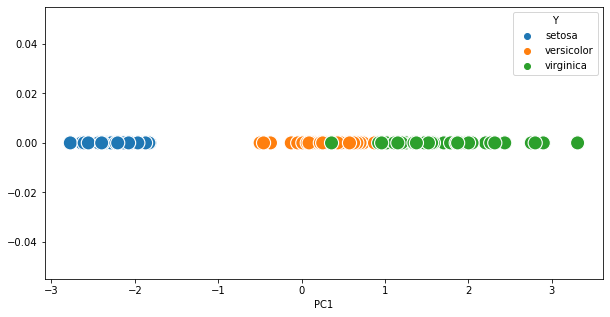

In [9]:
# visualização gráfica

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=200)

C:\Users\victo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

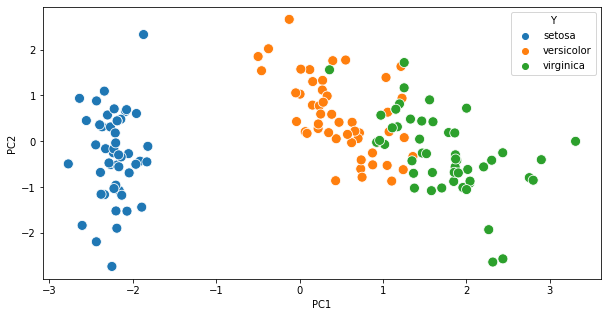

In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)